<a href="https://colab.research.google.com/github/ashisaxena710/Retail-Sales-Prediction/blob/main/Individual_Colab_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## ***1. Knowing Data***

### Import Libraries

In [26]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings('ignore')

###  Loading Datasets

In [27]:
rossmann_store_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 2 /Rossmann Stores Data.csv",parse_dates=['Date'])
store_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 2 /store.csv")

### Viewing Datasets

In [28]:
rossmann_store_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [29]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [30]:
print("The shape of Rossmann Store Dataset is",rossmann_store_data.shape ,"\nThe shape of Store Dataset is" ,store_data.shape)

The shape of Rossmann Store Dataset is (1017209, 9) 
The shape of Store Dataset is (1115, 10)


### Dataset Information

In [31]:
rossmann_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


Great! we have no null values in this dataset.

In [32]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [33]:
print("The number of duplicate values present in Rossmann Store Dataset is",rossmann_store_data.duplicated().sum(),"\nThe number of duplicate values present in Store Dataset is",rossmann_store_data.duplicated().sum())

The number of duplicate values present in Rossmann Store Dataset is 0 
The number of duplicate values present in Store Dataset is 0


Great! No duplicate values are there in our both the datsets.

#### Missing Values/Null Values

Above we saw that there are no null values in Rossmann dataset . But we do have null values in Store datset .

In [35]:
# Missing Values/Null Values Count
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Figure size 720x432 with 0 Axes>

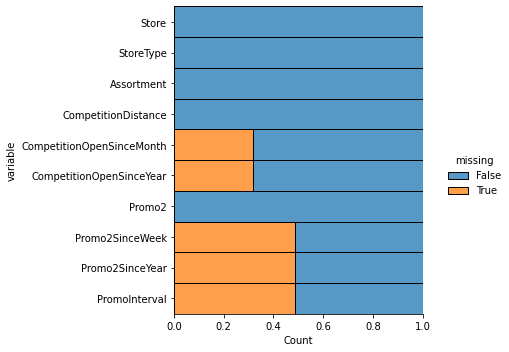

In [36]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=store_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [44]:
# Dataset Columns
print("List of columns of Rossmann Dataset :\n" ,list(rossmann_store_data.columns))
print("\n")
print("List of columns of tore Dataset :\n" ,list(store_data.columns))

List of columns of Rossmann Dataset :
 ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


List of columns of tore Dataset :
 ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [46]:
# Dataset Describe
rossmann_store_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [47]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [56]:
# Checking Unique Values for each variable of Rossmann Store Dataset
for i in rossmann_store_data.columns:
  j=rossmann_store_data[i].value_counts().reset_index()
  print("Column name is:",i,"and it value is:",j)
  print("\n")

Column name is: Store and it value is:       index  Store
0         1    942
1       726    942
2       708    942
3       709    942
4       713    942
...     ...    ...
1110    159    758
1111    637    758
1112    636    758
1113    633    758
1114    155    758

[1115 rows x 2 columns]


Column name is: DayOfWeek and it value is:    index  DayOfWeek
0      5     145845
1      4     145845
2      3     145665
3      2     145664
4      1     144730
5      7     144730
6      6     144730


Column name is: Date and it value is:          index  Date
0   2015-07-31  1115
1   2013-11-06  1115
2   2013-11-18  1115
3   2013-11-17  1115
4   2013-11-16  1115
..         ...   ...
937 2014-10-28   935
938 2014-10-27   935
939 2014-10-26   935
940 2014-10-25   935
941 2014-12-08   935

[942 rows x 2 columns]


Column name is: Sales and it value is:        index   Sales
0          0  172871
1       5674     215
2       5558     197
3       5483     196
4       6214     195
...      ...     ...

## 3. ***Data Wrangling***

In [ ]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(),inplace=True)
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode().iloc[0],inplace=True)
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode().iloc[0],inplace=True)

We observed from the Store dataset that values of the columns Promo2SinceWeek, Promo2SinceYear and PromoInterval are null where the value of the column Promo2 is zero. So in those columns we'll fill the null values with zero.

In [ ]:
store_data['Promo2SinceWeek'].fillna(0,inplace=True)
store_data['Promo2SinceYear'].fillna(0,inplace=True)
store_data['PromoInterval'].fillna(0,inplace=True)

In [ ]:
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now we have treated all the null values of Store dataset . Let's merge the two given datasts .